In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

fits_file = "Data Recreation.fits"

fits.info(fits_file)

with fits.open(fits_file, mode="readonly") as hdulist: #HDU (Header Data Unit)
    tess_bjds = hdulist[1].data['TIME'] #TBJD (Tess Barycentric Julian Date) TBJD = BJD - 2457000.0
    sap_fluxes = hdulist[1].data['SAP_FLUX'] #SAP FLux (Simple Aperture Photometry Flux) Flux after summing the calibrated pixels 
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX'] #PDCSAP FLux (Pre-Search Data Conditioned Simple Aperture Photometry Flux) SAP flux corrected for instrumental Variations

rpdcsap_fluxes = pdcsap_fluxes[np.where(~np.isnan(pdcsap_fluxes))]
rtess_bjds = tess_bjds[np.where(~np.isnan(pdcsap_fluxes))]

Filename: Data Recreation.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   1231R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


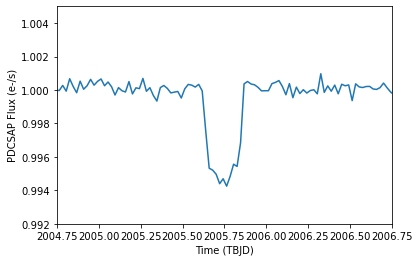

In [2]:
t0 = 2005.75
fig, ax = plt.subplots()
ax.plot(rtess_bjds, rpdcsap_fluxes/np.median(rpdcsap_fluxes))
ax.set_xlim(t0 - 1.0, t0 + 1.0)
ax.set_ylim(0.992, 1.005)
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

In [8]:
def find_nearest(array, value):
    index = (np.abs(array - value)).argmin()
    return index

def boxplot(time, transit_depth, transit_width, transit_center):
    #create array of proper length
    box = np.ones(len(time))
    # 1 outside of transit center and transit width
    for i in range(len(time)):
        if time[i] > transit_center - transit_width/2 and time[i] < transit_center + transit_width/2:
            box[i] = transit_depth
        else:
            box[i] = 1
    return box

single_transit_time = rtess_bjds[find_nearest(rtess_bjds,2002):find_nearest(rtess_bjds,2008)]
single_transit_flux = rpdcsap_fluxes[find_nearest(rtess_bjds,2002):find_nearest(rtess_bjds,2008)]

single_transit_flux = single_transit_flux/np.median(single_transit_flux)

transit_depth = np.linspace(0.994, 1, num = 15)
transit_width = np.linspace(0.1, 0.5, num = 24)
transit_center = np.linspace(single_transit_time[170], single_transit_time[185], num = 25)

LS = np.zeros((len(transit_depth), len(transit_width), len(transit_center)))

for i in range(len(transit_depth)):
    for j in range(len(transit_width)):
        for k in range(len(transit_center)):
            M = boxplot(single_transit_time, transit_depth[i], transit_width[j], transit_center[k])
            
            sdev = (single_transit_flux - M)**2
            LS[i,j,k] = np.sum(sdev)

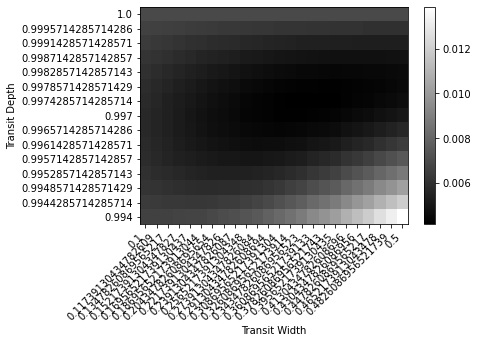

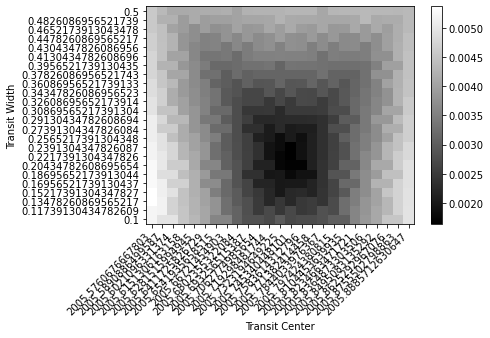

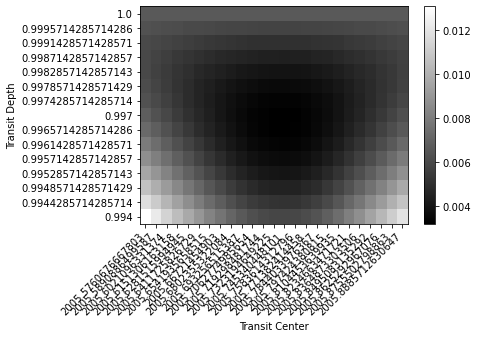

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(np.sum(LS, axis=2), origin="lower",cmap='gray', aspect="auto") #T, dt
fig.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(transit_width)))
ax.set_xticklabels(transit_width, rotation = 45, ha='right')
ax.set_yticks(np.arange(len(transit_depth)))
ax.set_yticklabels(transit_depth)
ax.set_ylabel('Transit Depth')
ax.set_xlabel('Transit Width')

plt.show()

fig, ax = plt.subplots()
im = ax.imshow(np.sum(LS, axis=0), origin="lower",cmap='gray', aspect="auto") #t0, dt
fig.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(transit_center)))
ax.set_xticklabels(transit_center, rotation = 45, ha='right')
ax.set_yticks(np.arange(len(transit_width)))
ax.set_yticklabels(transit_width)
ax.set_ylabel('Transit Width')
ax.set_xlabel('Transit Center')

plt.show()

fig, ax = plt.subplots()
im = ax.imshow(np.sum(LS, axis=1), origin="lower", cmap='gray', aspect="auto") #T, t0
fig.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(transit_center)))
ax.set_xticklabels(transit_center, rotation = 45, ha='right')
ax.set_yticks(np.arange(len(transit_depth)))
ax.set_yticklabels(transit_depth)
ax.set_ylabel('Transit Depth')
ax.set_xlabel('Transit Center')

plt.show()

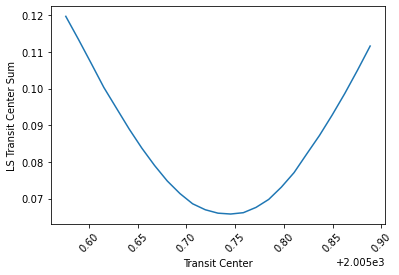

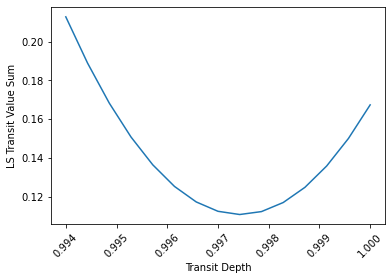

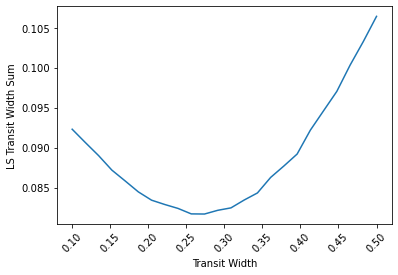

In [14]:
plt.plot(transit_center, np.sum(LS, axis=(0,1)))
plt.xticks(rotation = 45)
plt.xlabel("Transit Center")
plt.ylabel("LS Transit Center Sum")
plt.show()

plt.plot(transit_depth, np.sum(LS, axis=(2,1)))
plt.xticks(rotation = 45)
plt.xlabel("Transit Depth")
plt.ylabel("LS Transit Value Sum")
plt.show()

plt.plot(transit_width, np.sum(LS, axis=(0,2)))
plt.xticks(rotation = 45)
plt.xlabel("Transit Width")
plt.ylabel("LS Transit Width Sum")
plt.show()